## Importing the Packages 

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from numpy import nan
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## Importing dataset

In [112]:
airbnb_df = pd.read_csv('Airbnb_Australia.csv')

In [113]:
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,603007.0,https://www.airbnb.com/rooms/603007,2.020000e+13,9/10/22,previous scrape,Spacious apartment near Botanic Gardens,"Well appointed South Yarra apartment, close to...","Right near the famous Royal Botanic Gardens, a...",https://a0.muscache.com/pictures/cbbf545f-fe7b...,2705870,...,5.00,4.81,4.67,NaN,t,1,0,1,0,0.47
1,607674.0,https://www.airbnb.com/rooms/607674,2.020000e+13,9/9/22,city scrape,NaN,Edna Walling cottage is a quaint full-sized do...,Sherbrooke is located in a rainforest with tow...,https://a0.muscache.com/pictures/11626259/9430...,2558288,...,4.33,4.47,3.80,NaN,f,2,2,0,0,0.15
2,9835.0,https://www.airbnb.com/rooms/9835,2.020000e+13,9/9/22,city scrape,Beautiful Room & House,"<b>The space</b><br />House: Clean, New, Moder...",Very safe! Family oriented. Older age group.,https://a0.muscache.com/pictures/44620/5a5815c...,33057,...,4.75,4.50,4.67,NaN,f,1,0,1,0,0.03
3,621155.0,https://www.airbnb.com/rooms/621155,2.020000e+13,9/10/22,previous scrape,Picture Perfect Oasis Richmond,<b>The space</b><br />This gorgeous one bedroo...,NaN,https://a0.muscache.com/pictures/7891547/a413c...,355966,...,5.00,5.00,5.00,NaN,f,3,3,0,0,0.01
4,1271310.0,https://www.airbnb.com/rooms/1271310,2.020000e+13,9/9/22,city scrape,Stunning Victorian 1 Brm Apartment,Unique Victorian 1 bedroom apartment. Centrall...,Its a lovely quiet tree lined street. There ar...,https://a0.muscache.com/pictures/2d5e8201-f3b9...,6919472,...,4.86,4.95,5.00,NaN,t,1,1,0,0,0.28


## Descriptive Statistics & Information

In [114]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18236 entries, 0 to 18235
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18236 non-null  float64
 1   listing_url                                   18236 non-null  object 
 2   scrape_id                                     18236 non-null  float64
 3   last_scraped                                  18236 non-null  object 
 4   source                                        18236 non-null  object 
 5   name                                          18234 non-null  object 
 6   description                                   17810 non-null  object 
 7   neighborhood_overview                         11076 non-null  object 
 8   picture_url                                   18236 non-null  object 
 9   host_id                                       18236 non-null 

In [115]:
airbnb_df.shape

(18236, 75)

In [116]:
airbnb_df.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.823600e+04,1.823600e+04,1.823600e+04,11213.000000,11996.000000,18234.000000,18234.000000,0.0,18236.000000,18236.000000,...,14228.000000,14233.000000,14228.000000,14228.000000,0.0,18236.000000,18236.000000,18236.000000,18236.000000,14513.000000
mean,1.139584e+17,2.020000e+13,1.276996e+08,0.933913,0.836165,20.003894,31.959800,NaN,-37.828234,145.017766,...,4.799266,4.814247,4.834165,4.674261,NaN,12.023580,9.179699,2.753290,0.049956,1.231161
std,2.449231e+17,0.000000e+00,1.270591e+08,0.192331,0.266769,78.806374,129.367414,NaN,0.076305,0.150659,...,0.409065,0.416120,0.337837,0.459608,NaN,33.665318,23.821517,18.735433,0.560440,1.629179
min,9.835000e+03,2.020000e+13,9.082000e+03,0.000000,0.000000,1.000000,1.000000,NaN,-38.325610,144.506620,...,0.000000,1.000000,1.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.969739e+07,2.020000e+13,2.519868e+07,0.990000,0.800000,1.000000,1.000000,NaN,-37.856390,144.957640,...,4.770000,4.800000,4.800000,4.590000,NaN,1.000000,0.000000,0.000000,0.000000,0.160000
50%,3.392678e+07,2.020000e+13,8.014866e+07,1.000000,0.960000,2.000000,2.000000,NaN,-37.819580,144.979650,...,4.940000,4.960000,4.930000,4.790000,NaN,1.000000,1.000000,0.000000,0.000000,0.700000
75%,5.055430e+07,2.020000e+13,1.984334e+08,1.000000,1.000000,6.000000,9.000000,NaN,-37.801035,145.027660,...,5.000000,5.000000,5.000000,4.940000,NaN,5.000000,4.000000,1.000000,0.000000,1.750000
max,7.120000e+17,2.020000e+13,4.787379e+08,1.000000,1.000000,1091.000000,1839.000000,NaN,-37.486450,145.850230,...,5.000000,5.000000,5.000000,5.000000,NaN,230.000000,179.000000,168.000000,13.000000,49.270000


## Data Cleaning

### Checking for Null Values

In [117]:
airbnb_df.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3723
Length: 75, dtype: int64

### Checking for N/A values which are not zero

In [118]:
df = pd.DataFrame(airbnb_df.isna().sum().reset_index())

In [119]:
df.loc[df[0] != 0]

,index,0
5,name,2
6,description,426
7,neighborhood_overview,7160
11,host_name,2
12,host_since,2
13,host_location,4300
14,host_about,7826
15,host_response_time,7023
16,host_response_rate,7023
17,host_acceptance_rate,6240


### Dropping Unnesscary Columns

In [120]:
airbnb_clean = airbnb_df.drop(['id','name','description','host_acceptance_rate','host_response_rate','neighborhood_overview','host_about','host_listings_count','host_response_time','listing_url', 'scrape_id', 'last_scraped','source','picture_url', 'host_id','host_url', 'host_name', 'host_since', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url','host_verifications', 'host_has_profile_pic', 'host_identity_verified','neighbourhood_group_cleansed','bathrooms','amenities','calendar_updated','calendar_last_scraped','license','first_review','last_review'], axis = 1, inplace = False)

In [121]:
pd.DataFrame(airbnb_clean.isna().sum().reset_index())

,index,0
0,host_location,4300
1,host_neighbourhood,9751
2,host_total_listings_count,2
3,neighbourhood,7159
4,neighbourhood_cleansed,0
5,latitude,0
6,longitude,0
7,property_type,0
8,room_type,0
9,accommodates,0


In [122]:
airbnb_clean.columns

Index(['host_location', 'host_neighbourhood', 'host_total_listings_count',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_h

### Seperating the text and numeric data from bathroom_text for analysis

In [123]:
airbnb_clean[['number_of_bathroom', 'bathroom_desc']] = airbnb_clean['bathrooms_text'].str.extract('(\d+\.?\d*) ([A-Za-z]+)', expand=True)

### Imputing the N/A values with central tendency 

In [124]:
airbnb_clean['host_total_listings_count'] = airbnb_clean['host_total_listings_count'].fillna(airbnb_clean['host_total_listings_count'].mean())
airbnb_clean['bedrooms'] = airbnb_clean['bedrooms'].fillna(airbnb_clean['bedrooms'].mean())
airbnb_clean['beds'] = airbnb_clean['beds'].fillna(airbnb_clean['beds'].mean())
airbnb_clean['review_scores_rating'] = airbnb_clean['review_scores_rating'].fillna(airbnb_clean['review_scores_rating'].mean())
airbnb_clean['review_scores_rating'] = airbnb_clean['review_scores_rating'].fillna(airbnb_clean['review_scores_rating'].mean())
airbnb_clean['review_scores_accuracy'] = airbnb_clean['review_scores_accuracy'].fillna(airbnb_clean['review_scores_accuracy'].mean())
airbnb_clean['review_scores_cleanliness'] = airbnb_clean['review_scores_cleanliness'].fillna(airbnb_clean['review_scores_cleanliness'].mean())
airbnb_clean['review_scores_checkin'] = airbnb_clean['review_scores_checkin'].fillna(airbnb_clean['review_scores_checkin'].mean())
airbnb_clean['review_scores_communication'] = airbnb_clean['review_scores_communication'].fillna(airbnb_clean['review_scores_communication'].mean())
airbnb_clean['review_scores_location'] = airbnb_clean['review_scores_location'].fillna(airbnb_clean['review_scores_location'].mean())
airbnb_clean['review_scores_value'] = airbnb_clean['review_scores_value'].fillna(airbnb_clean['review_scores_value'].mean())
airbnb_clean['reviews_per_month'] = airbnb_clean['reviews_per_month'].fillna(airbnb_clean['reviews_per_month'].mean())

In [125]:
airbnb_clean.head(45)

,host_location,host_neighbourhood,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,number_of_bathroom,bathroom_desc
0,"Melbourne, Australia",South Yarra,1.0,"South Yarra, Victoria, Australia",Melbourne,-37.830220,144.986820,Private room in rental unit,Private room,2,...,4.810000,4.670000,t,1,0,1,0,0.470000,1,shared
1,"Melbourne, Australia",NaN,3.0,"Sherbrooke, Victoria, Australia",Yarra Ranges,-37.883880,145.361840,Entire guesthouse,Entire home/apt,2,...,4.470000,3.800000,f,2,2,0,0,0.150000,1,bath
2,NaN,NaN,1.0,"Bulleen, Victoria, Australia",Manningham,-37.772470,145.092320,Private room in home,Private room,2,...,4.500000,4.670000,f,1,0,1,0,0.030000,1,bath
3,"Melbourne, Australia",NaN,3.0,NaN,Yarra,-37.821010,144.992780,Entire rental unit,Entire home/apt,2,...,5.000000,5.000000,f,3,3,0,0,0.010000,1,bath
4,NaN,St Kilda,1.0,"St Kilda, Victoria, Australia",Port Phillip,-37.858760,144.985990,Entire rental unit,Entire home/apt,2,...,4.950000,5.000000,t,1,1,0,0,0.280000,1,bath
5,"Port Melbourne, Australia",Port Melbourne,3.0,"Port Melbourne, Victoria, Australia",Port Phillip,-37.841580,144.937940,Private room in condo,Private room,2,...,4.890000,4.740000,f,1,0,1,0,1.040000,1,private
6,"Melbourne, Australia",NaN,1.0,"Doncaster East, Victoria, Australia",Manningham,-37.784380,145.164770,Private room in townhouse,Private room,2,...,5.000000,5.000000,t,1,0,1,0,0.030000,1,private
7,"Melbourne, Australia",Brunswick,1.0,"Brunswick East, Victoria, Australia",Moreland,-37.766060,144.979510,Private room in rental unit,Private room,2,...,4.650000,4.570000,f,1,0,1,0,1.300000,1,shared
8,"Melbourne, Australia",St Kilda,20.0,"St Kilda, Victoria, Australia",Port Phillip,-37.859990,144.976620,Entire rental unit,Entire home/apt,2,...,4.780000,4.660000,f,10,10,0,0,0.290000,1,bath
9,"Melbourne, Australia",Port Melbourne,2.0,"Port Melbourne, Victoria, Australia",Port Phillip,-37.841680,144.943970,Entire rental unit,Entire home/apt,4,...,4.900000,4.790000,t,2,2,0,0,0.250000,1,bath


### Changing datatype for the necessary columns and dealing with N/A values

In [126]:
airbnb_clean['number_of_bathroom'] = airbnb_clean['number_of_bathroom'].astype(str).astype(float)

In [127]:
airbnb_clean['number_of_bathroom'] = airbnb_clean['number_of_bathroom'].fillna(airbnb_clean['number_of_bathroom'].mean())

### Checking if the N/A values are dealt with

In [163]:
pd.DataFrame(airbnb_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18236 entries, 0 to 18235
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_location                                 13936 non-null  object 
 1   host_neighbourhood                            8485 non-null   object 
 2   host_total_listings_count                     18236 non-null  float64
 3   neighbourhood                                 11077 non-null  object 
 4   neighbourhood_cleansed                        18236 non-null  object 
 5   latitude                                      18236 non-null  float64
 6   longitude                                     18236 non-null  float64
 7   property_type                                 18236 non-null  object 
 8   room_type                                     18236 non-null  object 
 9   accommodates                                  18236 non-null 

""


In [128]:
pd.DataFrame(airbnb_clean.isna().sum().reset_index())

,index,0
0,host_location,4300
1,host_neighbourhood,9751
2,host_total_listings_count,0
3,neighbourhood,7159
4,neighbourhood_cleansed,0
5,latitude,0
6,longitude,0
7,property_type,0
8,room_type,0
9,accommodates,0


## Exploratory Data Analysis

### Price distribution for avability_60 with respect to the geographical locations 

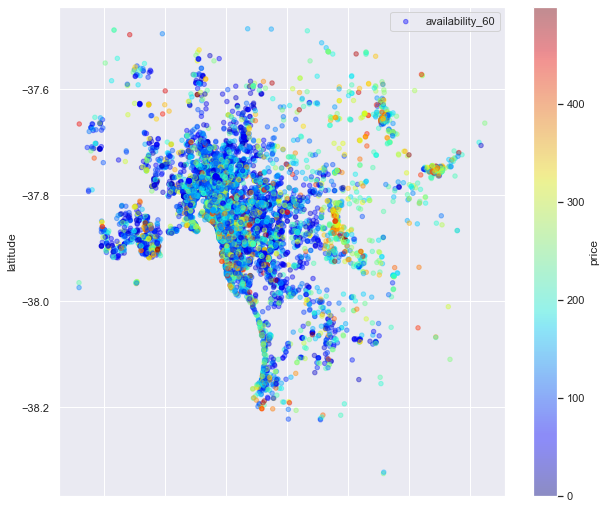

In [129]:
sub_6=airbnb_clean[airbnb_clean.price < 500]
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_60', c='price',
cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,9))
viz_4.legend()

### Total number of room distribution over the Australian neighborhood

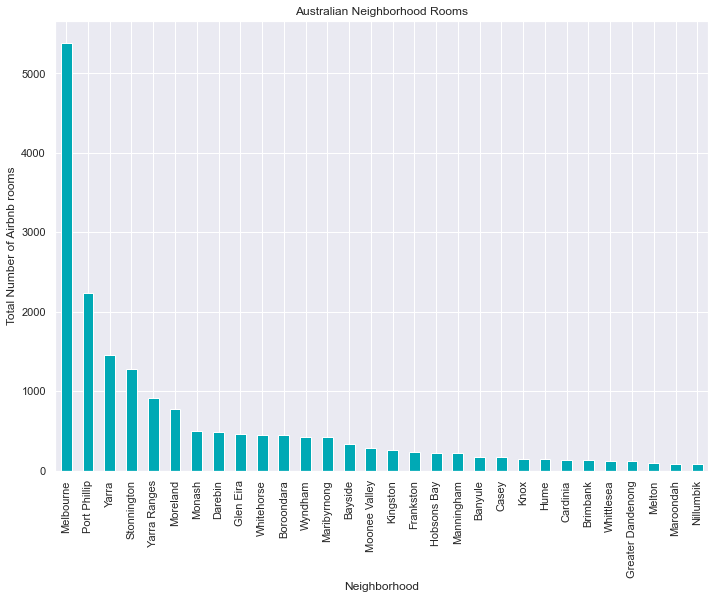

In [130]:
A=airbnb_clean.neighbourhood_cleansed.value_counts()
A.plot(kind='bar',color = "#00a9b5")
plt.title('Australian Neighborhood Rooms')
plt.ylabel('Total Number of Airbnb rooms')
plt.xlabel('Neighborhood');

### Relationship between neighnhourhood & Ratings based on price & room type

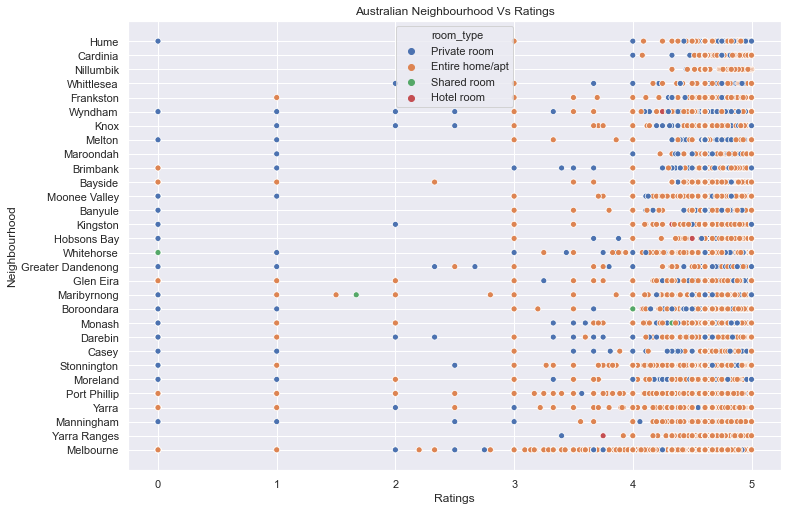

In [131]:
#Scatterplot showing the ratings of cambridge in different neighborhoods of different rooms. 
#Australian Cities  Neighbourhood vs Rating 
airbnb_clean[['neighbourhood_cleansed', 'review_scores_rating']]
sns.scatterplot(data=airbnb_clean, x='review_scores_rating', y='neighbourhood_cleansed',hue="room_type")
plt.ylabel('Neighbourhood')
plt.xlabel('Ratings')
sns.set(rc={'figure.figsize':(11.6,8.27)})
plt.title("Australian Neighbourhood Vs Ratings")
plt.show()

### Relationship between availability & price

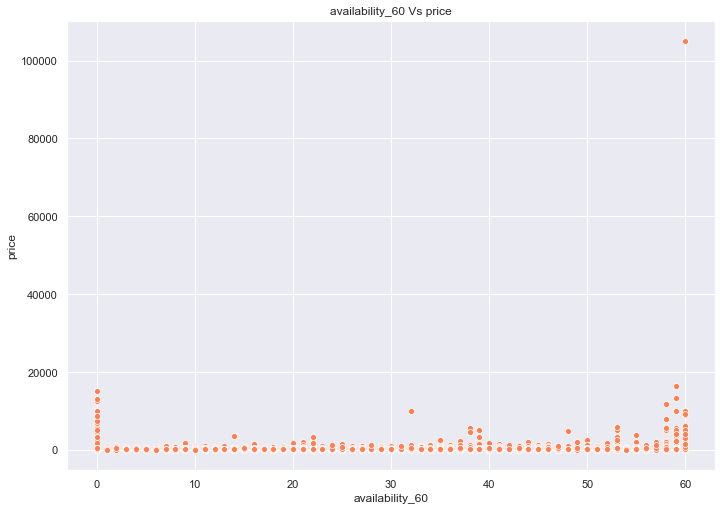

In [132]:
airbnb_clean[['availability_60', 'price']]

sns.scatterplot(data=airbnb_clean, x='availability_60', y='price', color ='coral')
plt.ylabel('price')
plt.xlabel('availability_60')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("availability_60 Vs price")
plt.show()

### Relationship between roomtype & availability

Text(0.5, 1.0, 'Room Types vs availability_60')

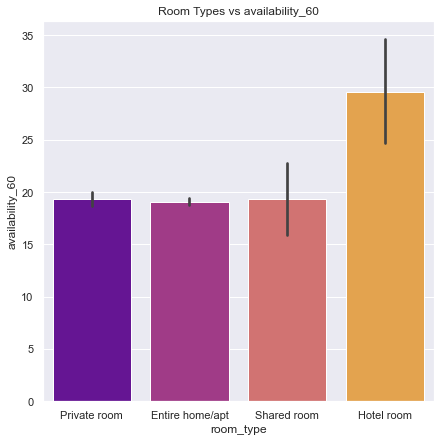

In [133]:

plt.figure(figsize=(7,7))
sns.barplot(x='room_type', y='availability_60', palette='plasma', data=airbnb_df)
plt.title('Room Types vs availability_60')


### Barplot denoting the availability on the basis of property type

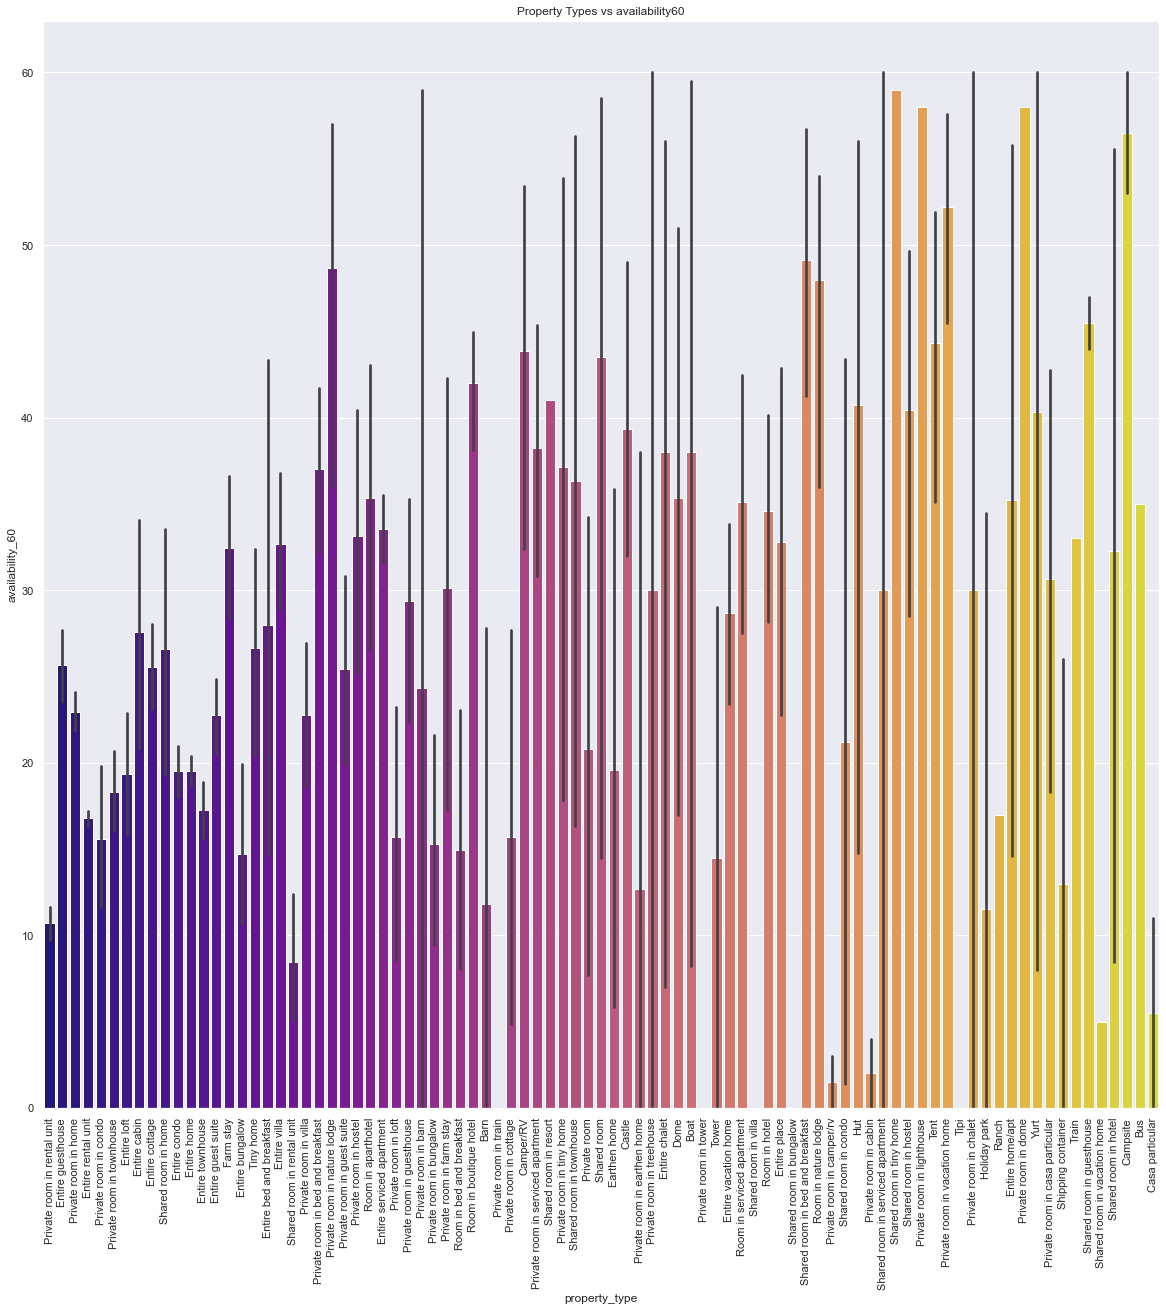

In [134]:
plt.figure(figsize=(20,20))
plot=sns.barplot(x='property_type', y='availability_60', palette='plasma', data=airbnb_df)
plt.title('Property Types vs availability60')
for item in plot.get_xticklabels():
    item.set_rotation(90)

### Total number of airbnb listed according to neighbourhood

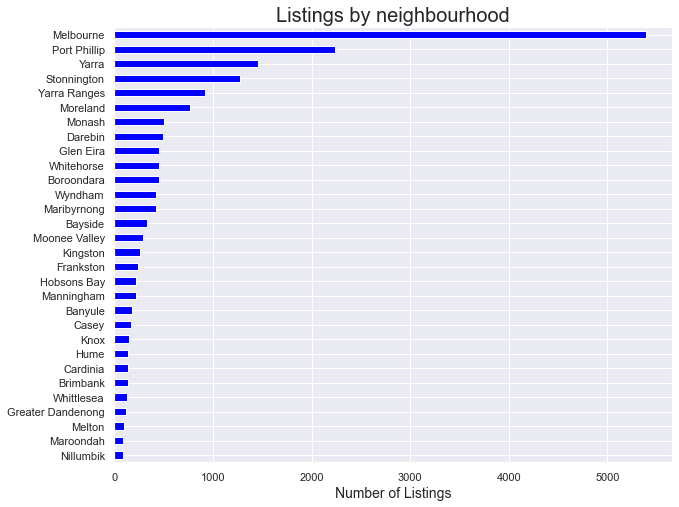

In [135]:
feq=airbnb_clean.neighbourhood_cleansed.value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color="blue")
plt.title("Listings by neighbourhood", fontsize=20)
plt.xlabel('Number of Listings', fontsize=14)
plt.savefig('nl.png', dpi=600, bbox_inches='tight')
plt.show()

### Correlation plot to understand the relationship between each varibale 

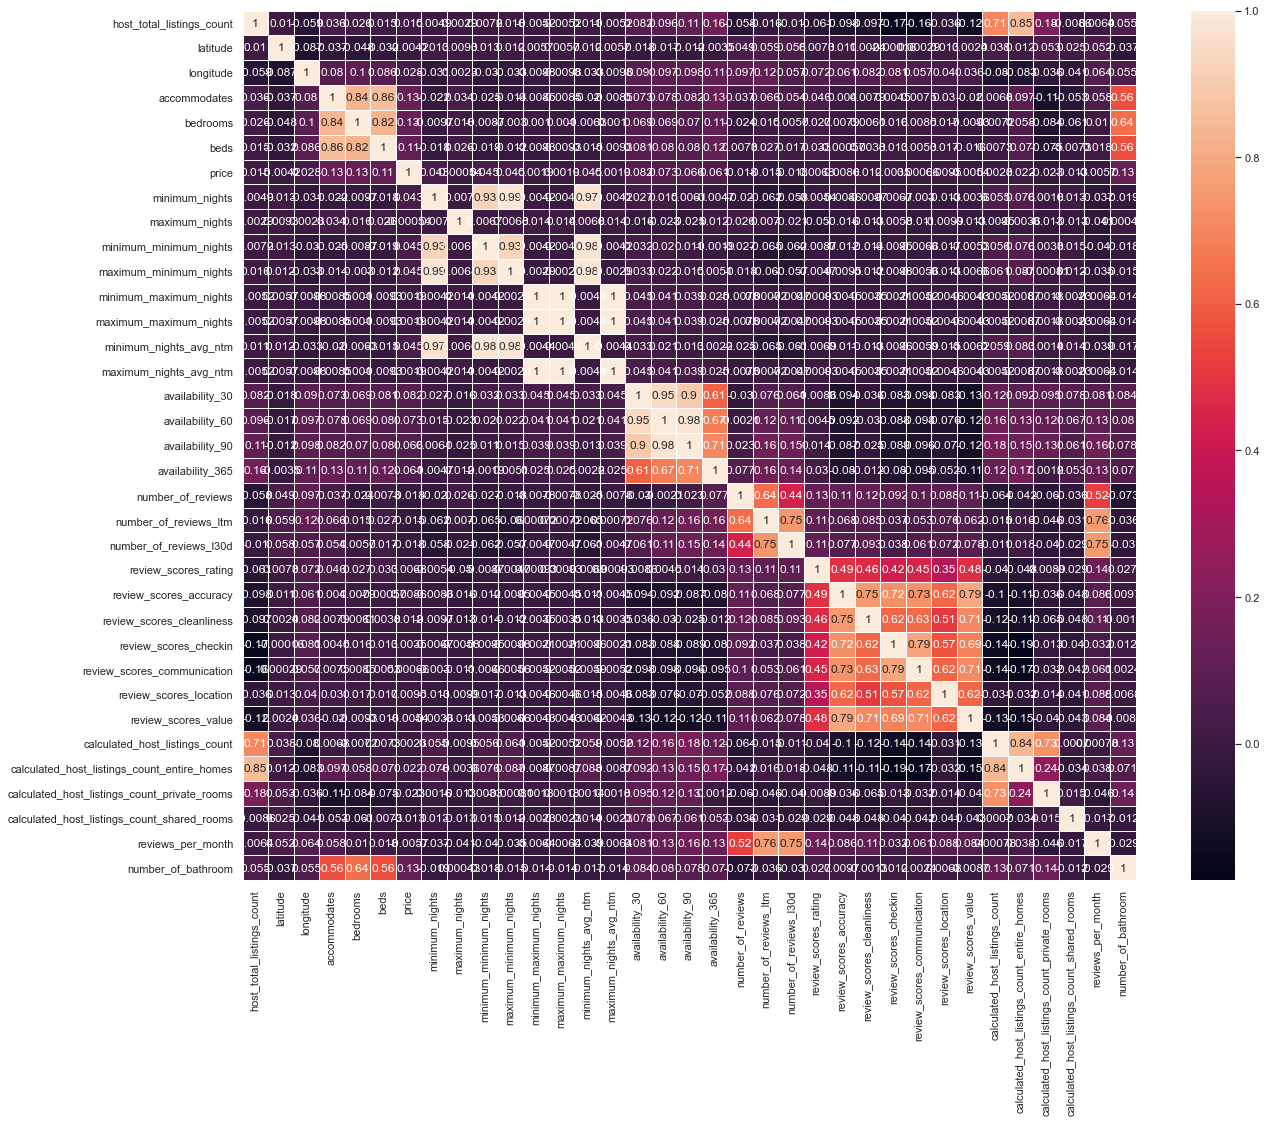

In [136]:
corr = airbnb_clean.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corr, annot=True, linewidths=.8, ax=ax)
plt.show()

## Predictive Modelling 

### One Hot Encoding for categorical variables

In [137]:
X_features_encode = pd.get_dummies(airbnb_clean, columns = {'host_location','host_neighbourhood',
                                                            'instant_bookable',
                                                            'bathroom_desc',
                                                            'neighbourhood',
                                                            'neighbourhood_cleansed',
                                                            'has_availability','room_type',
                                                            'property_type','bathrooms_text'})

In [162]:
X_features_encode

,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,...,bathrooms_text_7 baths,bathrooms_text_8.5 baths,bathrooms_text_8.5 shared baths,bathrooms_text_9 baths,bathrooms_text_9.5 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,instant_bookable_f,instant_bookable_t
0,1.0,-37.83022,144.98682,2,1.000000,1.0,59,1,7,1,...,0,0,0,0,0,0,0,0,0,1
1,3.0,-37.88388,145.36184,2,1.000000,1.0,275,2,180,2,...,0,0,0,0,0,0,0,0,1,0
2,1.0,-37.77247,145.09232,2,1.000000,2.0,60,1,365,1,...,0,0,0,0,0,0,0,0,1,0
3,3.0,-37.82101,144.99278,2,1.000000,1.0,105,14,21,14,...,0,0,0,0,0,0,0,0,1,0
4,1.0,-37.85876,144.98599,2,1.000000,1.0,100,2,365,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18231,3.0,-37.57250,145.64223,8,3.000000,6.0,446,2,7,2,...,0,0,0,0,0,0,0,0,0,1
18232,6.0,-37.52927,145.33519,5,2.000000,4.0,255,1,28,1,...,0,0,0,0,0,0,0,0,0,1
18233,1.0,-37.53405,145.35107,7,3.000000,3.0,190,2,30,2,...,0,0,0,0,0,0,0,0,1,0
18234,6.0,-37.53035,145.33727,5,2.000000,3.0,255,1,28,1,...,0,0,0,0,0,0,0,0,0,1


### Splitting features and labels into X_features & y variables

In [139]:
X_features = X_features_encode.drop(['availability_60'], axis = 1, inplace = False)

In [140]:
y = X_features_encode['availability_60']

### Checking if data is normally distributed

<AxesSubplot:>

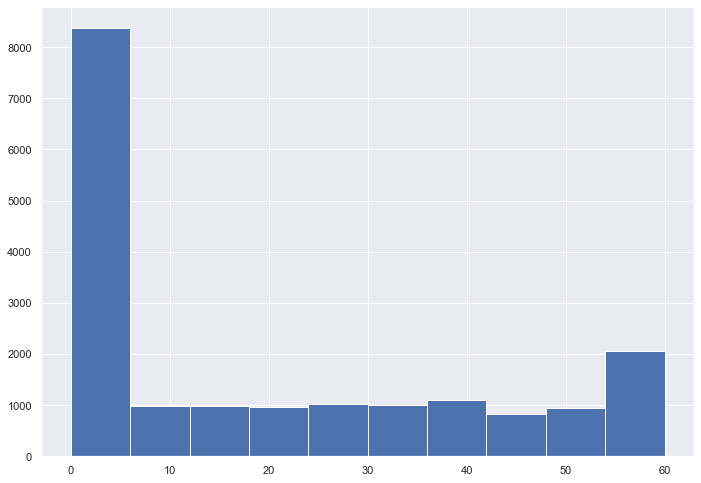

In [141]:
y.hist()

### Using log to normalised the data, graph shown below 

In [142]:
y_log = np.log1p(y)

<AxesSubplot:>

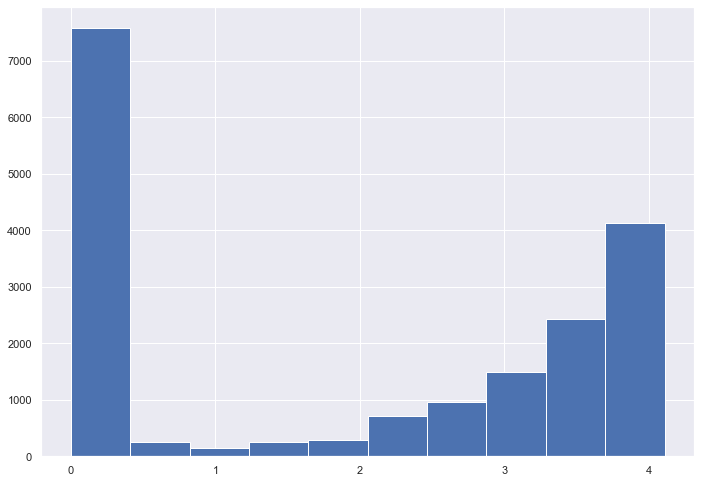

In [143]:
y_log.hist()

### Splitting the data into train and test data

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_features,y_log, test_size=0.2, random_state=0)

### Decision Tree Regressor

In [149]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

0.9651106817473044


In [150]:
y_pred = DTree.predict(X_test)

In [151]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
17703,3.332205,3.295837
6877,3.496508,3.663233
18216,0.000000,0.000000
4429,0.000000,0.000000
3679,4.043051,4.043051
...,...,...
11730,0.000000,0.000000
2105,0.000000,0.000000
18070,2.564949,3.133600
2618,4.060443,4.060443


In [152]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11758216302865347
Mean Squared Error: 0.10453867750130548
Root Mean Squared Error: 0.3233244152570379


### Random Forest Regressor

In [153]:
from sklearn.ensemble import RandomForestRegressor
Model=RandomForestRegressor(n_estimators=200)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

In [154]:
reg_score = Model.score(X_test, y_test)

In [155]:
reg_score

0.9801810082252764

In [156]:
y_pred = Model.predict(X_test)

In [157]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0905546292273822
Mean Squared Error: 0.05938353895403994
Root Mean Squared Error: 0.24368737955429687


### Ridge Regression 

In [158]:
ridge_reg = Ridge(alpha=10)

ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)

/Users/ishamore/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53819e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [159]:
pred = ridge_reg.predict(X_test)

In [160]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
Variance_score = r2_score(y_test,pred)

print('MSE: {0:.4f}, RMSE:{1:.4f}, Variance score:{2:.4f}'.format(mse,rmse,Variance_score))

MSE: 0.2765, RMSE:0.5258, Variance score:0.9077


<AxesSubplot:>

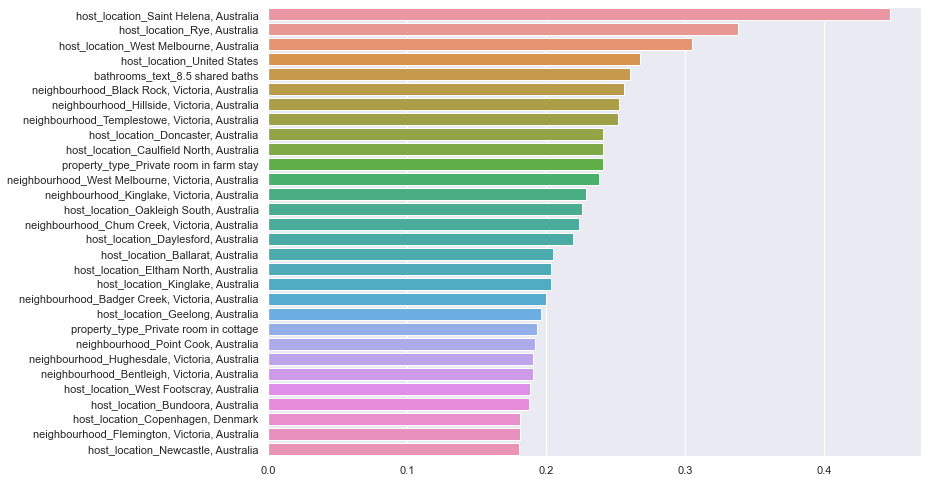

In [161]:
coef = pd.Series(ridge_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)[:30]
sns.barplot(x=coef_sort.values, y=coef_sort.index)